In [1]:
import pandas as pd

# Import csv
original_df = pd.read_csv(
    '../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
dropped_df = original_df.drop(["EmployeeNumber", "EmployeeCount"], axis = 1)
dropped_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,80,0,17,3,2,9,6,0,8


# Cleaning

In [2]:
# Separte y and X's
X = dropped_df.drop("Attrition", axis = 1)
y = dropped_df["Attrition"]

## Drop unnecessary columns

In [3]:
for col in X.columns:
    print(col)

Age
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [4]:
# For each series in the df, find all the ones that have 1 unique value and all series with 2 unique values
values_1 = []
values_2 = []

for series in X.columns:
    if X[series].nunique() == 1:
        values_1.append(series)
    elif X[series].nunique() == 2:
            values_2.append(series)
print(values_1)
print(values_2)


['Over18', 'StandardHours']
['Gender', 'OverTime', 'PerformanceRating']


In [5]:
X_drop_singles = X.drop(values_1, axis = 1)
X_drop_dummies = pd.get_dummies(X_drop_singles)
X_labeled = X_drop_dummies.drop(['Gender_Male', 'OverTime_Yes'], axis = 1)
X_labeled.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole

In [6]:
y_drop_dummies = pd.get_dummies(y)
y_labeled = y_drop_dummies.drop('Yes', axis = 1)

# Split data to Train/Test sets

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X_labeled, y_labeled, random_state=1)

Using TensorFlow backend.


In [8]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [9]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline


In [10]:

# define RFE
rfe_tree = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe_tree.fit(X_train_scaled, y_train)
# summarize all features
for i in range(X_train_scaled.shape[1]):
	print('Column: %s, Selected %s, Rank: %.3f' % (X_labeled.columns[i], rfe_tree.support_[i], rfe_tree.ranking_[i]))

Column: Age, Selected True, Rank: 1.000
Column: DailyRate, Selected True, Rank: 1.000
Column: DistanceFromHome, Selected False, Rank: 2.000
Column: Education, Selected False, Rank: 15.000
Column: EnvironmentSatisfaction, Selected False, Rank: 18.000
Column: HourlyRate, Selected True, Rank: 1.000
Column: JobInvolvement, Selected False, Rank: 9.000
Column: JobLevel, Selected False, Rank: 6.000
Column: JobSatisfaction, Selected False, Rank: 31.000
Column: MonthlyIncome, Selected True, Rank: 1.000
Column: MonthlyRate, Selected True, Rank: 1.000
Column: NumCompaniesWorked, Selected False, Rank: 3.000
Column: PercentSalaryHike, Selected False, Rank: 19.000
Column: PerformanceRating, Selected False, Rank: 33.000
Column: RelationshipSatisfaction, Selected False, Rank: 26.000
Column: StockOptionLevel, Selected False, Rank: 8.000
Column: TotalWorkingYears, Selected False, Rank: 7.000
Column: TrainingTimesLastYear, Selected False, Rank: 22.000
Column: WorkLifeBalance, Selected False, Rank: 11.000

In [11]:
# summarize all features
for i in range(X_train_scaled.shape[1]):
    if rfe_tree.support_[i] == True:
	    print('Column: %s, Selected %s, Rank: %.3f' % (X_labeled.columns[i], rfe_tree.support_[i], rfe_tree.ranking_[i]))

Column: Age, Selected True, Rank: 1.000
Column: DailyRate, Selected True, Rank: 1.000
Column: HourlyRate, Selected True, Rank: 1.000
Column: MonthlyIncome, Selected True, Rank: 1.000
Column: MonthlyRate, Selected True, Rank: 1.000


In [12]:
from sklearn.feature_selection import RFECV
# Create pipeline
rfe_train_DT_auto = RFECV(estimator=DecisionTreeClassifier())
model_DT = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s', rfe_train_DT_auto),('m',model_DT)])

# Fit the pipeline on all available data
pipeline.fit(X_train_scaled, y_train)

# Evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# Report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.787 (0.032)


In [13]:
# summarize all features
for i in range(X.shape[1]):
    if rfe_train_DT_auto.support_[i] == True:
	    print('Column: %s, Selected %s, Rank: %.3f' % (X_labeled.columns[i], rfe_train_DT_auto.support_[i], rfe_train_DT_auto.ranking_[i]))

Column: Age, Selected True, Rank: 1.000
Column: DailyRate, Selected True, Rank: 1.000
Column: DistanceFromHome, Selected True, Rank: 1.000
Column: Education, Selected True, Rank: 1.000
Column: EnvironmentSatisfaction, Selected True, Rank: 1.000
Column: HourlyRate, Selected True, Rank: 1.000
Column: JobInvolvement, Selected True, Rank: 1.000
Column: JobLevel, Selected True, Rank: 1.000
Column: MonthlyIncome, Selected True, Rank: 1.000
Column: MonthlyRate, Selected True, Rank: 1.000
Column: NumCompaniesWorked, Selected True, Rank: 1.000
Column: PercentSalaryHike, Selected True, Rank: 1.000
Column: StockOptionLevel, Selected True, Rank: 1.000
Column: TotalWorkingYears, Selected True, Rank: 1.000
Column: TrainingTimesLastYear, Selected True, Rank: 1.000
Column: WorkLifeBalance, Selected True, Rank: 1.000
Column: YearsInCurrentRole, Selected True, Rank: 1.000
Column: YearsSinceLastPromotion, Selected True, Rank: 1.000
Column: YearsWithCurrManager, Selected True, Rank: 1.000
Column: Business

>lr 0.799 (0.041)
>per 0.828 (0.037)
>cart 0.764 (0.041)
>rf 0.769 (0.033)
>gbm 0.761 (0.039)


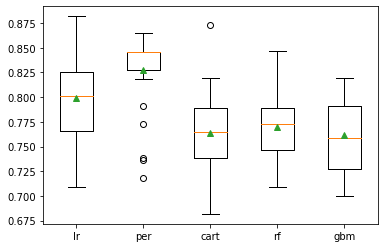

In [14]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# perceptron
	rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gbm
	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train_scaled, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>kn nan (nan)


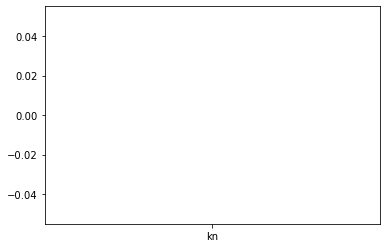

In [15]:
# get a list of models to evaluate
from sklearn.neighbors import KNeighborsClassifier
def get_models_2():
	models = dict()
	# kn
	rfe = RFE(estimator=KNeighborsClassifier(), n_features_to_select=5)
	model = KNeighborsClassifier()
	models['kn'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model_2(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


models = get_models_2()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model_2(model, X_train_scaled, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create pipeline
rfe_train_RF_auto = RFECV(estimator=RandomForestClassifier())
model_RF = RandomForestClassifier()
pipeline_RF = Pipeline(steps=[('s', rfe_train_RF_auto),('m',model_RF)])

# Fit the pipeline on all available data
pipeline_RF.fit(X_train_scaled, y_train)

# Evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline_RF, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# Report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
rfe_train_auto.ranking_

In [ ]:
rfe_train_auto.keys()

In [ ]:
X_train

In [ ]:
x_to_one_hot_index = [1, 3, 6, 8, 11, 12, 14, 18, 19, 24]
x_to_normalize_index = [0, 2, 4, 5, 7, 9, 10, 13, 15, 16, 17, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31]

In [ ]:
X_train_to_one_hot = X_train.iloc[:, x_to_one_hot_index]
X_test_to_one_hot = X_test.iloc[:, x_to_one_hot_index]


In [ ]:
X_train_to_one_hot

In [ ]:
X_test_to_one_hot

In [ ]:
# Encode X training data

transformed_X_train_arr = []
encoders = []
for feature in range(len(x_to_one_hot_index)):
    X_label_encoder = LabelEncoder()
    X_label_encoder.fit(X_train_to_one_hot.iloc[:,feature])
    encoded_X = X_label_encoder.transform(X_train_to_one_hot.iloc[:,feature])
    transformed_X_train_arr.append(encoded_X)
one_hot_x_train = to_categorical(transformed_X_train_arr)
one_hot_x_train

In [ ]:
transformed_X_train_arr = []
for feature in range(len(x_to_one_hot_index)):
    X_label_encoder = LabelEncoder()
    X_label_encoder.fit(X_train_to_one_hot.iloc[:,feature])
    encoded_X = X_label_encoder.transform(X_train_to_one_hot.iloc[:,feature])
    transformed_X_train_arr.append(encoded_X)
one_hot_x_train = to_categorical(transformed_X_train_arr)
one_hot_x_train

In [ ]:
# Encode X testing data

transformed_X_test_arr = []
for feature in range(len(x_to_one_hot_index)):
    encoded_X = X_label_encoder.transform(X_test_to_one_hot.iloc[:,feature])
    transformed_X_test_arr.append(encoded_X)
one_hot_x_test = to_categorical(transformed_X_test_arr)
one_hot_x_test






In [ ]:
# Encode Y training data

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y = label_encoder.transform(y_train)
one_hot_y_train = to_categorical(encoded_y)
one_hot_y


In [ ]:
# Encode Y test data

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(X_train_to_one_hot)
encoded_X_train = label_encoder.transform(X_train_to_one_hot)

label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)

In [ ]:
encoded_X_train

In [ ]:
X_train_relabeled = []
for x in X_train_to_one_hot:
    X_train_relabeled.append(X_train_to_one_hot[:,x])
X_train_relabeled

In [ ]:
transformed_X_arr = []
for feature in range(len(transform_arr)):
    label_encoder.fit(transform_arr[feature])
    encoded_X = label_encoder.transform(transform_arr[feature])
    transformed_X_arr.append(encoded_X)
transformed_X_arr

In [ ]:
X_test_relabeled = []
for x in X_test_to_one_hot:
    X_test_relabeled.append(X_test_to_one_hot[:,x])
X_test_relabeled

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

def unique(list):
    unique_list = []
    for x in list:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list
unique(transformed_X_arr[2])


In [ ]:
print(one_hot_x.shape)

# Cleaning

## One-hot Encoding

## Normalization

In [ ]:
x_to_normalize_index = [2, 5, 6, 8, 10, 11, 14, 16, 17, 18, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 31, 32]

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)